In [ ]:
import numpy as np
from numpy import cumsum, log, polyfit, sqrt, std, subtract
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal as ss
import seaborn as sns
from pylab import plot, show
%matplotlib inline


In [ ]:
dataset = pd.read_csv("/content/intern_dataset.csv")

In [ ]:
dataset.head(10)

,Time,Signal1,Signal2,Label
0,2017-08-14 11:37:49.791,33668.091913,0.856726,A
1,2017-08-14 11:37:49.801,32564.903040,0.856705,A
2,2017-08-14 11:37:49.811,31454.043305,0.856683,A
3,2017-08-14 11:37:49.821,30335.387166,0.856659,A
4,2017-08-14 11:37:49.831,29207.142938,0.856634,A
5,2017-08-14 11:37:49.841,28066.378446,0.856607,A
6,2017-08-14 11:37:49.851,26910.094146,0.856579,A
7,2017-08-14 11:37:49.861,25736.387974,0.856550,A
8,2017-08-14 11:37:49.871,24545.389112,0.856518,A
9,2017-08-14 11:37:49.881,23339.584544,0.856486,A


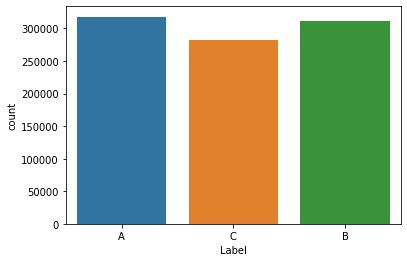

In [ ]:
sns.countplot(x="Label", data = dataset)

In [ ]:
datasetA = dataset.loc[dataset["Label"]=="A"]
datasetB = dataset.loc[dataset["Label"]=="B"]
datasetC = dataset.loc[dataset["Label"]=="C"]

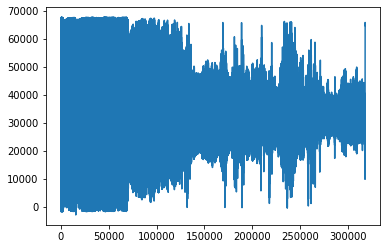

In [ ]:
plt.plot(datasetA["Signal1"])

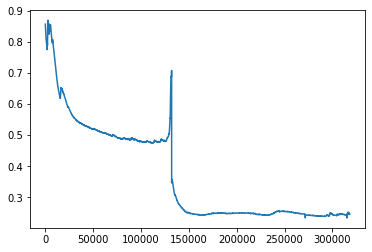

In [ ]:
plt.plot(datasetA["Signal2"])

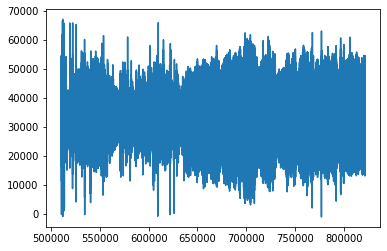

In [ ]:
plt.plot(datasetB["Signal1"])

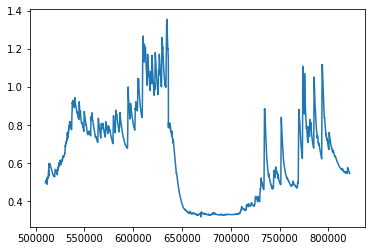

In [ ]:
plt.plot(datasetB["Signal2"])

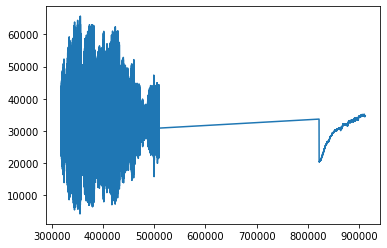

In [ ]:
plt.plot(datasetC["Signal1"])

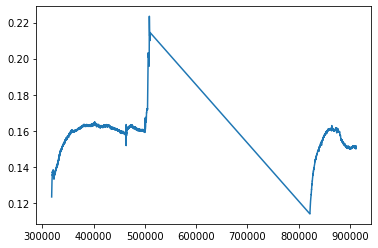

In [ ]:
plt.plot(datasetC["Signal2"])

# Complexity

The more complex the data, the more its description will depend on the small details, this means that the informational content will quickly degrade as the scale of the map decreases instead a less complex data will retain more significant information well into larger scales.

# 1. Detrended Fluctuation Analysis

The main idea lying behind DFA is to assess how the informational content of a time series is distributed.


###How do we calculate the FA

**1.** The first the step
is to measure the map to the territory the gap for each time window size.

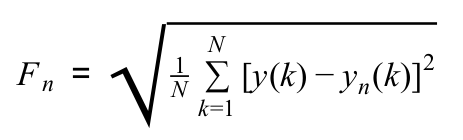

where,

* Fn = the gap for a certain window size
* n = the number of points in the time series 
* y(k) = the value of the time series at time k 
* yn(k) = the value of the regression point at time k

There will be an exponential correlation
between the map to territory gap and the size of the time window 

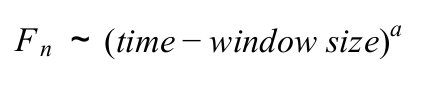

Therefore a linear correlation between the logarithm of the gap and the labyrinth of the time window

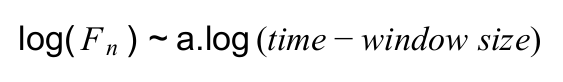

DFA is precisely the slope of this linear regression.

DFA measures how the correlation between successive readings of a time series involves depending on the length of the strand.

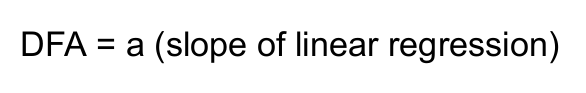

In [ ]:
def calc_rms(x,scale):
  shape = (x.shape[0]//scale,scale)
  X = np.lib.stride_tricks.as_strided(x,shape = shape)
  scale_ax = np.arange(scale)
  rms = np.zeros(X.shape[0])
  for e,xcut in enumerate(X):
    coeff = np.polyfit(scale_ax,xcut,1)
    xfit = np.polyval(coeff, scale_ax)
    rms[e] = np.sqrt(np.mean((xcut - xfit)**2))
  return rms

In [ ]:
def dfa(x, scale_lim=[5,9], scale_dens=0.25, show=False):
  y = np.cumsum(x - np.mean(x))
  scales = (2**np.arange(scale_lim[0], scale_lim[1], scale_dens)).astype(np.int)
  fluct = np.zeros(len(scales))
  for e, sc in enumerate(scales):
    fluct[e] = np.sqrt(np.mean(calc_rms(y, sc)**2))
  coeff = np.polyfit(np.log2(scales), np.log2(fluct), 1)
  if show:
    fluctfit = 2**np.polyval(coeff,np.log2(scales))
    plt.loglog(scales, fluct, 'bo')
    plt.loglog(scales, fluctfit, 'r', label=r'$\alpha$ = %0.2f'%coeff[0])
    plt.title('DFA')
    plt.xlabel(r'$\log_{10}$(time window)')
    plt.ylabel(r'$\log_{10}$<F(t)>')
    plt.legend()
    plt.show()
  return scales, fluct, coeff[0]

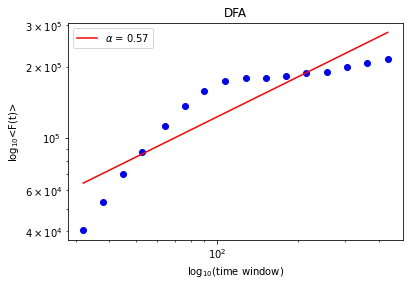

DFA exponent Signal1 A: 0.5669822676625101


In [ ]:
x= datasetA["Signal1"]
scales, fluct, alphaA = dfa(x, show=1)
print("DFA exponent Signal1 A: {}".format(alphaA))

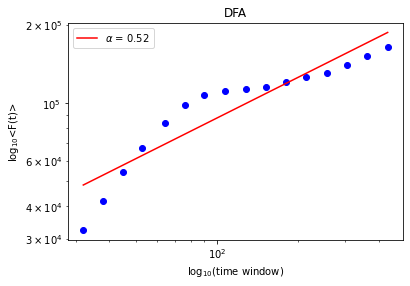

DFA exponent Signal1 B: 0.5208740835595762


In [ ]:
x= datasetB["Signal1"]
scales, fluct, alphaB = dfa(x, show=1)
print("DFA exponent Signal1 B: {}".format(alphaB))

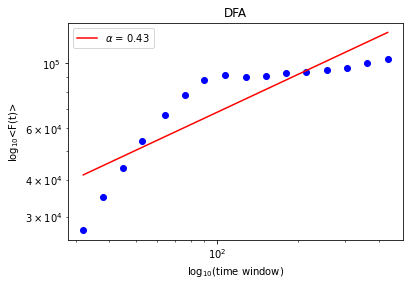

DFA exponent Signal1 C: 0.43018283949558456


In [ ]:
x= datasetC["Signal1"]
scales, fluct, alphaC = dfa(x, show=1)
print("DFA exponent Signal1 C: {}".format(alphaC))


* **DFA exponent Signal1 A: 0.5669822676625101**
* **DFA exponent Signal1 B: 0.5208740835595762**
* **DFA exponent Signal1 C: 0.43018283949558456**

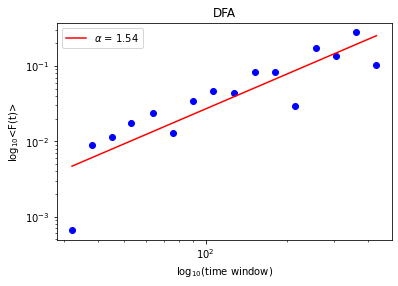

DFA exponent Signal2 A: 1.5350675610508953


In [ ]:
x= datasetA["Signal2"]
scales, fluct, alphaA = dfa(x, show=1)
print("DFA exponent Signal2 A: {}".format(alphaA))

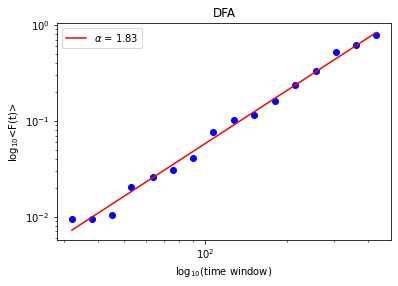

DFA exponent Signal2 B: 1.8267976212461396


In [ ]:
x= datasetB["Signal2"]
scales, fluct, alphaB = dfa(x, show=1)
print("DFA exponent Signal2 B: {}".format(alphaB))

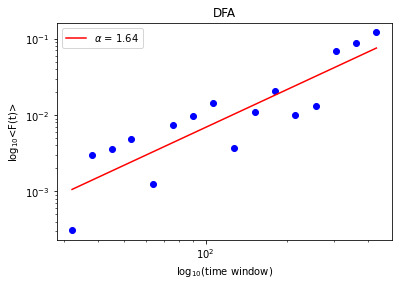

DFA exponent Signal2 C: 1.6400877531797584


In [ ]:
x= datasetC["Signal2"]
scales, fluct, alphaC = dfa(x, show=1)
print("DFA exponent Signal2 C: {}".format(alphaC))

* **DFA exponent Signal2 A: 1.5350675610508953**
* **DFA exponent Signal2 B: 1.8267976212461396**
* **DFA exponent Signal2 C: 1.6400877531797584**


# Hurst Exponent

A time series can then be characterised in the following manner:
*   H < 0.5 : The time series is mean reverting & long-term switching between high and low
*   H = 0.5 : The time series is a Geometric Brownian Motion
*   H > 0.5 : The time series is trending & long-term correlation






In [ ]:
def replaceZeroes(data):
  mean = np.mean(data)
  for i in data:
    if i==0.0:
      i = mean
  return data


In [ ]:
def hurst(ts):
  ts= list(ts)
  lags = range(2, 20)
  tau = [sqrt(std(subtract(ts[lag:], ts[:-lag]))) for lag in lags]
  lags = replaceZeroes(lags)
  tau = replaceZeroes(tau)
  #plot(log(lags), log(tau)); show()
  m = polyfit(log(lags), log(tau), 1)                                 
  hurst = m[0]*2.0
  print("Hurst :   %s" % hurst)
  return hurst

In [ ]:
hurstA1 = hurst(datasetA["Signal1"])

Hurst :   0.9003385793886569


In [ ]:
hurstB1 = hurst(datasetB["Signal1"])

Hurst :   0.8878979204970042


In [ ]:
hurstC1 = hurst(datasetC["Signal1"])

Hurst :   0.8684052481723293


* **Hurst Exponent Signal1 A: 0.9003385793886569**
* **Hurst Exponent Signal1 B: 0.8878979204970042**
* **Hurst Exponent Signal1 C: 0.8684052481723293**

In [ ]:
hurstA2 = hurst(datasetA["Signal2"])

Hurst :   0.5025337938440829


In [ ]:
hurstB2 = hurst(datasetB["Signal2"])

Hurst :   0.6468995448959081


In [ ]:
hurstC2 = hurst(datasetC["Signal2"])

Hurst :   0.5063087888393915


* **Hurst Exponent Signal2 A: 0.5025337938440829**
* **Hurst Exponent Signal2 B: 0.6468995448959081**
* **Hurst Exponent Signal2 C: 0.5063087888393915**


# Sample entropy

The higher the Sample entropy, the more difficult it is to forecast it.

In [ ]:
def sampen(L):
  L= list(L)
  N = len(L)
  m = int(N*(0.001))
  r=np.std(L)
  B = 0.0
  A = 0.0
  xmi = np.array([L[i : i + m] for i in range(0,N-m,m)])
  xmj = np.array([L[i : i + m] for i in range(0,N-m + 1,m)])
  B = np.sum([np.sum(np.abs(xmii - xmj).max(axis=1) <= r) - 1 for xmii in xmi])
  m += 1
  xm = np.array([L[i : i + m] for i in range(0,N-m+ 1,m )])
  A = np.sum([np.sum(np.abs(xmi - xm).max(axis=1) <= r) - 1 for xmi in xm])
  return -np.log(A / B)

In [ ]:
print("Sample entropy Signal1 A: {}".format(sampen(datasetA["Signal1"])))
print("Sample entropy Signal1 B: {}".format(sampen(datasetB["Signal1"])))
print("Sample entropy Signal1 C: {}".format(sampen(datasetC["Signal1"])))

Sample entropy Signal1 A: 0.012159044445547301
Sample entropy Signal1 B: 0.052094391862982065
Sample entropy Signal1 C: 0.004697463204702342


In [ ]:
print("Sample entropy Signal2 A: {}".format(sampen(datasetA["Signal2"])))
print("Sample entropy Signal2 B: {}".format(sampen(datasetB["Signal2"])))
print("Sample entropy Signal2 C: {}".format(sampen(datasetC["Signal2"])))

Sample entropy Signal2 A: 0.005108453013569359
Sample entropy Signal2 B: 0.00892189021573971
Sample entropy Signal2 C: 0.006115732262720517


# Conclusion

I analyzed both signal1 and signal2 separately to determine the complexity

So 
* According to signal1 **Class C** is the most complex
* According to signal2 **Class A** is the most complex

I used the Detrended Fluctuation Analysis, Hurst Exponent, and Sample entropy
As we can see both DFA and Hurst Exponent methods give the same result.
DFA is better than the other methods used.


##According to DFA exponent:
* DFA exponent Signal1 A: 0.5669822676625101
* DFA exponent Signal1 B: 0.5208740835595762
* DFA exponent Signal1 C: 0.43018283949558456

**C < B < A**
as we know, less slope more complex

so Complexity => **C > B > A**

* DFA exponent Signal2 A: 1.5350675610508953
* DFA exponent Signal2 B: 1.8267976212461396
* DFA exponent Signal2 C: 1.6400877531797584

**A < C < B**

so Complexity => **A > C > B**


## According to Hurst exponent:

* Hurst Exponent Signal1 A: 0.9003385793886569
* Hurst Exponent Signal1 B: 0.8878979204970042
* Hurst Exponent Signal1 C: 0.8684052481723293

**C < B < A**

so Complexity => **C > B > A**

* Hurst Exponent Signal2 A: 0.5025337938440829
* Hurst Exponent Signal2 B: 0.6468995448959081
* Hurst Exponent Signal2 C: 0.5063087888393915

**A < C < B**

so Complexity => **A > C > B**

## According to Sample entropy:

* Sample entropy Signal1 A: 0.012159044445547301
* Sample entropy Signal1 B: 0.052094391862982065
* Sample entropy Signal1 C: 0.004697463204702342
 
 **C < A < B**

 Most Complexity => **C**

* Sample entropy Signal2 A: 0.005108453013569359
* Sample entropy Signal2 B: 0.00892189021573971
* Sample entropy Signal2 C: 0.006115732262720517

 **A < C < B**

 Most Complexity => **A**

Lyapunov Exponent

The **Lyapunov exponent** is a value that describes the rate at which two nearly identical trajectories within a dynamic system's phase space will separate from one another per unit of time. 
It is indicative of a system's sensitivity to initial conditions:  a large Lyapunov will reflect a system in which a very small perturbation of the system will cause a large change in the trajectory of the system within its phase space.



# By **Naveen Saharan**



Refrences :

* Sample entropy- Wikipedia (https://en.wikipedia.org/wiki/Sample_entropy)
* Measuring Complexity and Predictability(https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5422060/)
* Time Series Analysis in Python(https://www.machinelearningplus.com/time-series/time-series-analysis-python/)
* COMPLEXITY EXPLORER(https://www.complexityexplorer.org/explore/glossary/32-lyapunov-exponent)